In [ ]:
import numpy as np
import scipy.stats as stats
from math import *
import matplotlib.pylab as plt
import seaborn as sns

def getGaussianNoise(mean, sigma2, k):
    sigma = np.sqrt(sigma2)
    pdf = stats.norm(mean, sigma)
    noise = pdf.rvs(k)
    if k == 1:
        return noise[0]  # Return a scalar when k=1
    else:
        return noise

def nextState(x, t, vt):
    return 0.5 * x + 25 * x / (1 + np.power(x, 2)) + 8 * np.cos(1.2 * t) + vt

def getObservation(x, t, wt):
    return np.power(x, 2) / 20 + wt

def priorX1(k):
    return getGaussianNoise(0, 10, k)

def likelihood(t, y, x):
    a = abs(y - getObservation(x, t, 0)) 
    return getGaussianNoise(0, a, 1)

for NumberOfParticles in [50, 100, 200, 500, 1000, 1500, 2000, 2100]:
    T = 200  # Number of Time Steps
    x = np.zeros(T)
    y = np.zeros(T)
    w = np.zeros(T)
    v = np.zeros(T)

    v[0] = 0
    w[0] = getGaussianNoise(0, 1, 1)
    x[0] = 0
    y[0] = getObservation(x[0], 0, w[0])

    for t in range(1, T):
        v[t] = getGaussianNoise(0, 10, 1)
        w[t] = getGaussianNoise(0, 1, 1)
        x[t] = nextState(x[t - 1], t, v[t])
        y[t] = getObservation(x[t], t, w[t])

    x_hat = np.zeros(T)
    y_hat = np.zeros(T)

    Weights = np.zeros([T, NumberOfParticles])
    particles = np.zeros([T, NumberOfParticles])
    xk = np.zeros(NumberOfParticles)
    wk = np.zeros(NumberOfParticles)
    for t in range(0, T):
        print('Iteration =' + str(t))
        if t == 0:
            particles[t] = priorX1(NumberOfParticles)
            Weights[t] = 1 / NumberOfParticles
        else:
            particlesPrev = particles[t - 1]
            WeightsPrev = Weights[t - 1]

            for i in range(NumberOfParticles):
                xk[i] = nextState(particlesPrev[i], t, getGaussianNoise(0, 10, 1))
                pl = stats.norm(0, 1).pdf(y[t] - getObservation(xk[i], t, 0))
                wk[i] = pl

            wk = wk / np.sum(wk)
            if (1 / np.sum(np.power(wk, 2)) < 0.50 * NumberOfParticles):
                xk = np.random.choice(xk, NumberOfParticles, p=wk) 
            Weights[t] = 1 / NumberOfParticles
            x_hat[t] = np.sum(wk * xk)

            particles[t] = xk

    for i in range(T):
        y_hat[i] = getObservation(x_hat[i], i, getGaussianNoise(0, 1, 1))
    
    # Correct Usage of np.savez
    filename = 'Tut7N' + str(NumberOfParticles)
    np.savez(filename, 
             NumberOfParticles=NumberOfParticles, 
             T=T, 
             x=x, 
             x_hat=x_hat, 
             y=y, 
             y_hat=y_hat, 
             particles=particles)


Iteration =0
Iteration =1
Iteration =2
Iteration =3
Iteration =4
Iteration =5
Iteration =6
Iteration =7
Iteration =8
Iteration =9
Iteration =10
Iteration =11
Iteration =12
Iteration =13
Iteration =14
Iteration =15
Iteration =16
Iteration =17
Iteration =18
Iteration =19
Iteration =20
Iteration =21
Iteration =22
Iteration =23
Iteration =24
Iteration =25
Iteration =26
Iteration =27
Iteration =28
Iteration =29
Iteration =30
Iteration =31
Iteration =32
Iteration =33
Iteration =34
Iteration =35
Iteration =36
Iteration =37
Iteration =38
Iteration =39
Iteration =40
Iteration =41
Iteration =42
Iteration =43
Iteration =44
Iteration =45
Iteration =46
Iteration =47
Iteration =48
Iteration =49
Iteration =50
Iteration =51
Iteration =52
Iteration =53
Iteration =54
Iteration =55
Iteration =56
Iteration =57
Iteration =58
Iteration =59
Iteration =60
Iteration =61
Iteration =62
Iteration =63
Iteration =64
Iteration =65
Iteration =66
Iteration =67
Iteration =68
Iteration =69
Iteration =70
Iteration =71
It

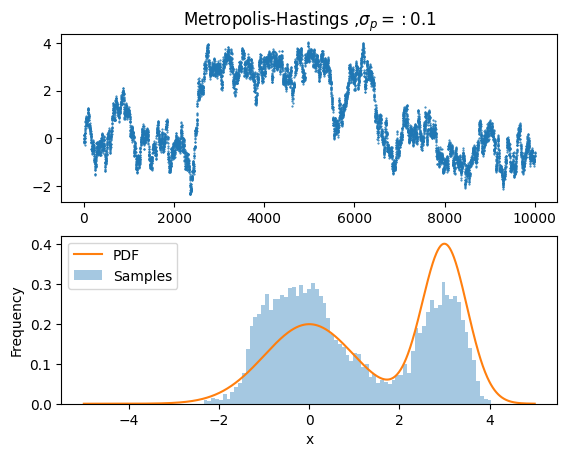

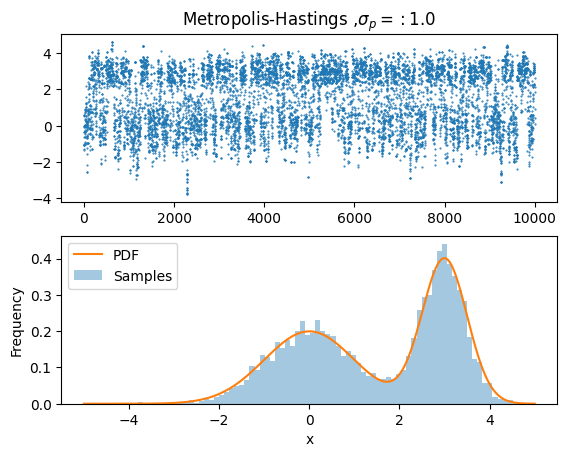

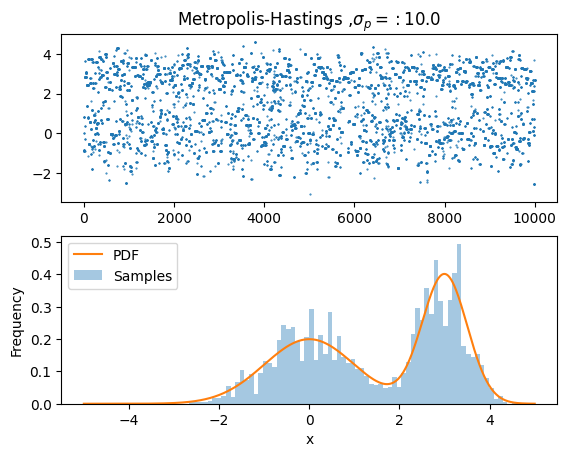

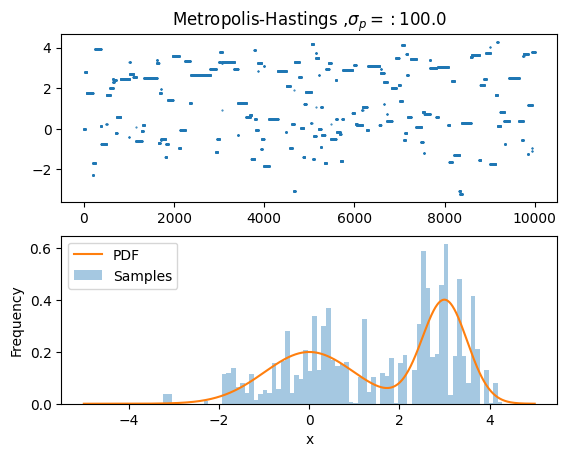

In [ ]:
import numpy as np
import scipy.stats as stats
from math import *
import matplotlib.pylab as plt

def targetDistribution(z):
    mu1=0
    sigma1=1
    mu2=3
    sigma2=0.5
    a1=0.5
    a2=0.5
    return a1*stats.norm.pdf(z,mu1,sigma1)+a2*stats.norm.pdf(z,mu2,sigma2)
# sigma=np.array([10])
sigma=np.array([0.1,1,10,100])
for sigmaP in sigma:
    n = 10000
    x_init = 0.
    vec = []
    vec.append(x_init)
    muP=np.mean(vec)
    proposal = stats.norm(muP,sigmaP).rvs(n) 
    for i in range(1,n):
        x=vec[i-1]
        can = x + proposal[i]
        aprob = np.amin([1.,targetDistribution(can)/targetDistribution(x)]) 
        u = np.random.uniform(0,1)
        if u < aprob:
            x = can
            vec.append(x)
        else:
            vec.append(x)
    x = np.linspace(-5,5,1000)
    y = targetDistribution(x)
    plt.subplot(2, 1, 1)
    plt.title('Metropolis-Hastings ,$\sigma_p=:$'+str(sigmaP))
    # plt.plot(vec)
    plt.plot(vec,'.',markersize=1)

    plt.subplot(2, 1, 2)
    plt.hist(vec,75,density=True,alpha=0.4)
    plt.plot(x,y)
    plt.ylabel('Frequency')
    plt.xlabel('x')
    plt.legend(('PDF','Samples'))
    plt.savefig('Plots/'+str(np.where(sigma == sigmaP)[0][0]))
    plt.show()
